In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("Uber_requests.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [19]:
## checking the shape of the data

In [20]:
df.shape

(6745, 6)

In [21]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [22]:
df.duplicated().sum()

0

In [23]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [24]:
# making sure there are no duplicates
df.duplicated(subset="Request id").sum()

0

In [25]:
# renaming the column names for ease of use purpose
df = df.rename(columns={'Request id':'request_id','Pickup point':'pickup_point','Driver id':'driver_id','Request timestamp':'request_timestamp','Drop timestamp':'drop_timestamp'})

In [26]:
df

,request_id,pickup_point,driver_id,Status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [27]:
df.columns

Index(['request_id', 'pickup_point', 'driver_id', 'Status',
       'request_timestamp', 'drop_timestamp'],
      dtype='object')

In [28]:
df.isnull().sum()*100/df.shape[0] 

request_id            0.000000
pickup_point          0.000000
driver_id            39.288362
Status                0.000000
request_timestamp     0.000000
drop_timestamp       58.028169
dtype: float64

In [29]:
df.isna().sum()

request_id              0
pickup_point            0
driver_id            2650
Status                  0
request_timestamp       0
drop_timestamp       3914
dtype: int64

In [30]:
df.request_timestamp

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: request_timestamp, Length: 6745, dtype: object

In [32]:
df['request_timestamp'] = df['request_timestamp'].astype(str)
df['request_timestamp'] = df['request_timestamp'].str.replace("/","-")
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], dayfirst=True)
df['request_timestamp'].head()

0   2016-11-07 11:51:00
1   2016-11-07 17:57:00
2   2016-12-07 09:17:00
3   2016-12-07 21:08:00
4   2016-07-13 08:33:16
Name: request_timestamp, dtype: datetime64[ns]

In [34]:
# convert 'drop_timestamp' column to datetime oject
df["drop_timestamp"] = df["drop_timestamp"].astype(str)
df['drop_timestamp'] = df['drop_timestamp'].str.replace("/", "-")
df['drop_timestamp'] = pd.to_datetime(df["drop_timestamp"], dayfirst=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [37]:
# extract the hour from the request time
req_hour = df["request_timestamp"].dt.hour
req_hour.head()
req_hour.value_counts()
df["req_hour"] = req_hour

In [38]:
#extract the day from the request time
req_day = df["request_timestamp"].dt.day
req_day.head()
req_day.value_counts()
df["req_day"] = req_day

In [40]:
df.head()

,request_id,pickup_point,driver_id,Status,request_timestamp,drop_timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-07-11 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-07-11 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-07-12 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-07-12 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


E:\my_softwares\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


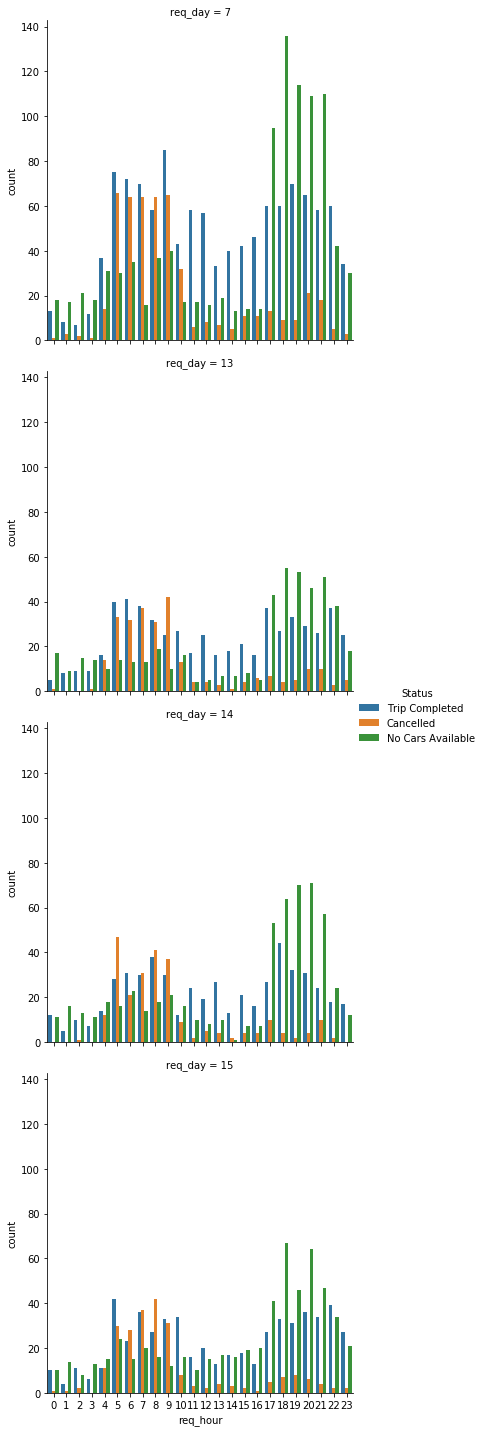

In [39]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "req_hour", hue = "Status", row = "req_day", data = df, kind = "count")

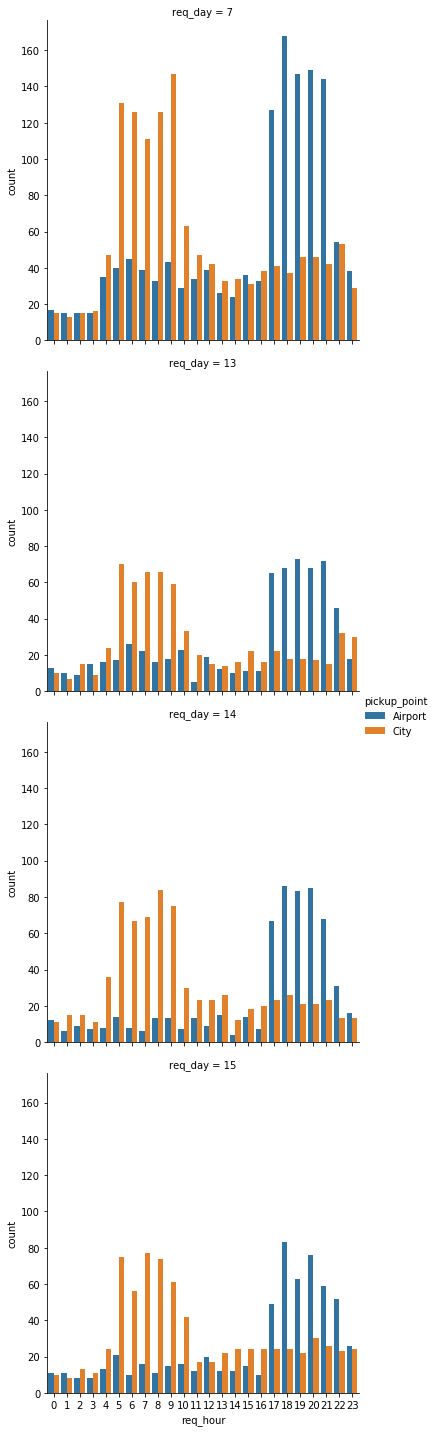

In [42]:
# factor plot of hour and day w.r.t. pickup point
sns.factorplot(x = "req_hour", hue = "pickup_point", row = "req_day", data = df, kind = "count")

In [43]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df.req_hour.apply(lambda x: time_period(x))

In [47]:
df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

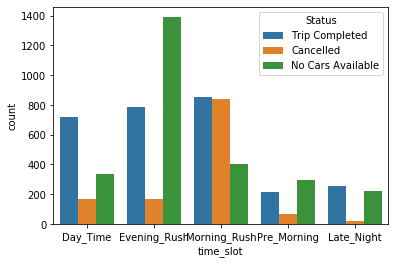

In [49]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Status", data = df)

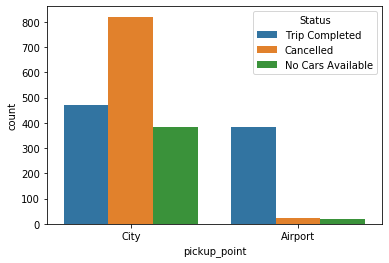

In [51]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
df_morning_rush = df[df.time_slot == "Morning_Rush"]
sns.countplot(x = "pickup_point", hue = "Status", data = df_morning_rush)

In [54]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Morning Rush)
df_airport_cancelled  = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "Airport") & (df_morning_rush["Status"] == "Cancelled")]
len(df_airport_cancelled.index)

23

In [56]:
df_city_cancelled = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "City") & (df_morning_rush["Status"] == "Cancelled")]
len(df_city_cancelled.index)

820

In [57]:
# let's look at the supply and demand in morning rush hour in the city
df_city_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "City") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_city_completed_morning_rush.index)

472

In [59]:
df_city_morning_rush  = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "City")]
len(df_city_morning_rush.index)

1677

In [61]:
# let's look at the supply and demand in morning rush hour at the airport
df_airport_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "Airport") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_airport_completed_morning_rush.index)

382

In [63]:
df_airport_morning_rush  = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "Airport")]
len(df_airport_morning_rush.index)

426

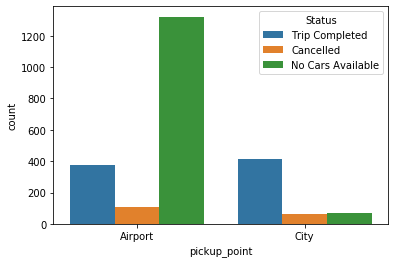

In [65]:
# let's look at the supply and demand in evening rush hour
df_evening_rush = df[df.time_slot == "Evening_Rush"]
sns.countplot(x = "pickup_point", hue = "Status", data = df_evening_rush)

In [66]:
# let's look at the supply and demand in evening rush hour in the city
df_city_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "City") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_city_completed_evening_rush.index)

411

In [67]:
df_city_evening_rush  = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "City")]
len(df_city_evening_rush.index)

542

In [68]:
# let's look at the supply and demand in evening rush hour from the airport
df_airport_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "Airport") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_airport_completed_evening_rush.index)

373

In [70]:
df_airport_evening_rush  = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "Airport")]
len(df_airport_evening_rush.index)

1800

In [71]:
# let's look at the severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening rush
df_airport_cancelled_evening_rush  = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "Airport") & (df_evening_rush["Status"] == "Cancelled")]
len(df_airport_cancelled_evening_rush.index)

106

In [72]:
df_city_cancelled_evening_rush = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "City") & (df_evening_rush["Status"] == "Cancelled")]
len(df_city_cancelled_evening_rush.index)

60

In [73]:
# severity of problem by location in Morning Rush (Unavailability of Cars)
df_airport_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "Airport") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_morning_rush.index)

21

In [74]:
df_city_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["pickup_point"] == "City") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_morning_rush.index)

385

In [75]:
# severity of problem by location in Evening Rush (Unavailability of Cars)
df_airport_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "Airport") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_evening_rush.index)

1321

In [76]:
df_city_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["pickup_point"] == "City") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_evening_rush.index)

71

In [85]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
    explode = (0.1, 0, 0)
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

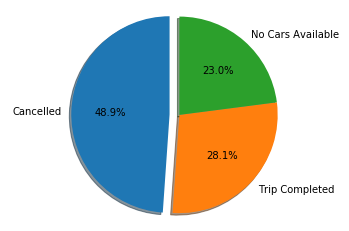

In [86]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is City
#explode = (0, 0.1, 0, 0)
df_city = df.loc[(df["pickup_point"] == "City") & (df.time_slot == "Morning_Rush")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

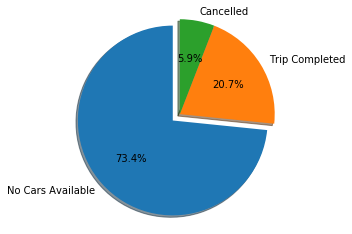

In [88]:
# Status of trips @ Evening Rush where pickup point is Airport
df_airport = df.loc[(df["pickup_point"] == "Airport") & (df.time_slot == "Evening_Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)